## Working with Classic Iris Dataset

In [28]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras import Model

%matplotlib inline

In [3]:
data = pd.read_csv("Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.drop('Id', axis=1, inplace=True)

In [5]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
profile = ProfileReport(data)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
y = data['Species']
X = data.drop('Species', axis=1)

In [8]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [9]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
encoder = LabelEncoder()

y = encoder.fit_transform(y)
species_mappings = {index: label for index, label in enumerate(encoder.classes_)}

species_mappings

{0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

In [11]:
scaler = StandardScaler()

X = scaler.fit_transform(X)

In [12]:
pd.DataFrame(X)

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

In [56]:
inputs = Input(shape=(4,))
x = Dense(16, activation='relu')(inputs)
outputs = Dense(3, activation='softmax')(x)

model = Model(inputs=inputs, outputs=outputs)

In [57]:
model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 4)]               0         
                                                                 
 dense_6 (Dense)             (None, 16)                80        
                                                                 
 dense_7 (Dense)             (None, 3)                 51        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


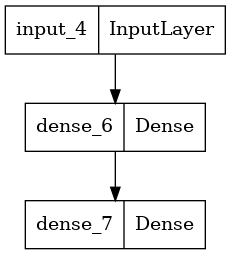

In [58]:
tf.keras.utils.plot_model(model)

In [59]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"]
)

In [60]:
batch_size = 32
epochs = 200

In [61]:
history = model.fit(X_train, y_train, validation_split = 0.2, batch_size=batch_size, epochs=epochs)

Epoch 1/200
3/3 [==============================] - 1s 94ms/step - loss: 0.9662 - accuracy: 0.5357 - val_loss: 0.9721 - val_accuracy: 0.5238
Epoch 2/200
3/3 [==============================] - 0s 20ms/step - loss: 0.9423 - accuracy: 0.5238 - val_loss: 0.9517 - val_accuracy: 0.5238
Epoch 3/200
3/3 [==============================] - 0s 17ms/step - loss: 0.9200 - accuracy: 0.5357 - val_loss: 0.9319 - val_accuracy: 0.5714
Epoch 4/200
3/3 [==============================] - 0s 19ms/step - loss: 0.8987 - accuracy: 0.5238 - val_loss: 0.9126 - val_accuracy: 0.5714
Epoch 5/200
3/3 [==============================] - 0s 17ms/step - loss: 0.8786 - accuracy: 0.5357 - val_loss: 0.8944 - val_accuracy: 0.6190
Epoch 6/200
3/3 [==============================] - 0s 21ms/step - loss: 0.8572 - accuracy: 0.5357 - val_loss: 0.8769 - val_accuracy: 0.6190
Epoch 7/200
3/3 [==============================] - 0s 20ms/step - loss: 0.8388 - accuracy: 0.5476 - val_loss: 0.8600 - val_accuracy: 0.6190
Epoch 8/200
3/3 [===

In [62]:
for i in history.history:
    print(i)

loss
accuracy
val_loss
val_accuracy


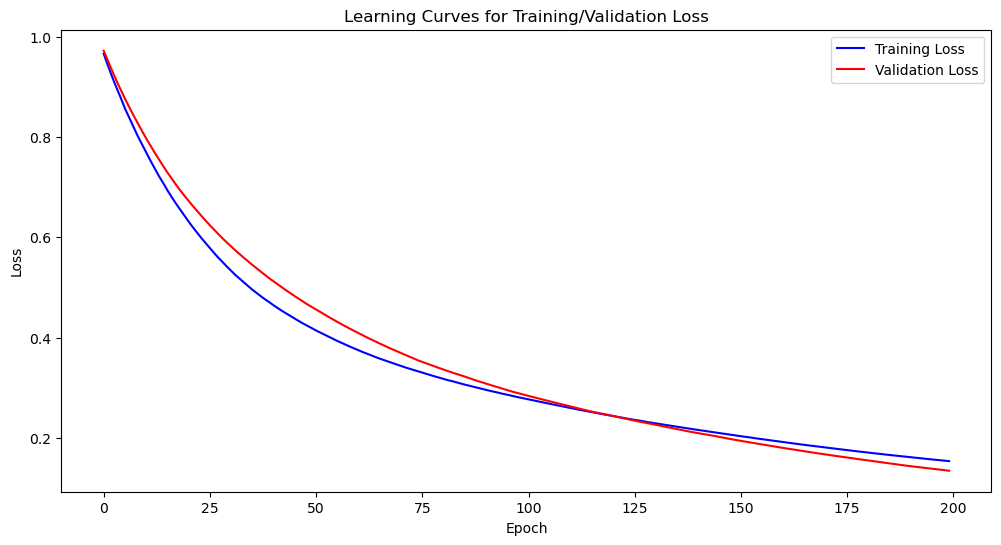

In [63]:
plt.figure(figsize=(12, 6))
plt.plot(range(epochs), history.history['loss'], color='blue')
plt.plot(range(epochs), history.history['val_loss'], color='red')
plt.title("Learning Curves for Training/Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Training Loss", "Validation Loss"])
plt.show()

In [64]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 6ms/step - loss: 0.2039 - accuracy: 0.9556


[0.2039152979850769, 0.9555555582046509]